In [1]:
import sys
sys.path.append(sys.path[0] + '/bin')

In [2]:
import PyMorpionSolitaire

Display module information:

In [3]:
# help(PyMorpionSolitaire)

Create a new game with default type (5 points in a line, touching allowed, starting configuration 'cross'):

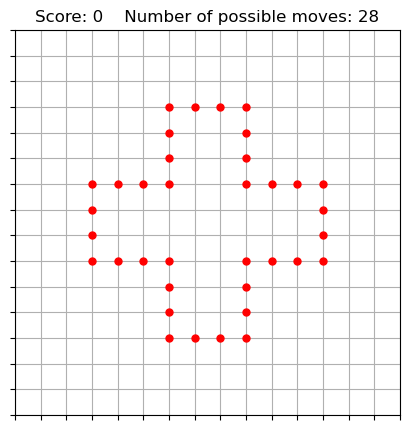

In [4]:
game = PyMorpionSolitaire.Game5T('c')
game.print()

Play a specific move:

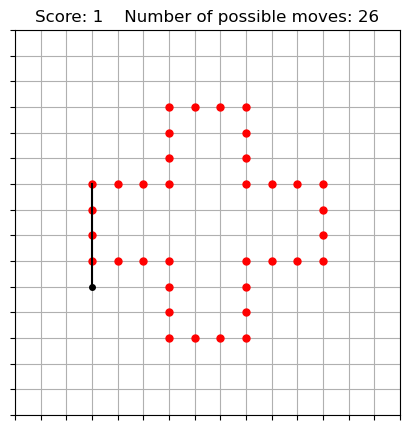

In [5]:
game.playByIndex(0)
game.print()

Play a move at random:

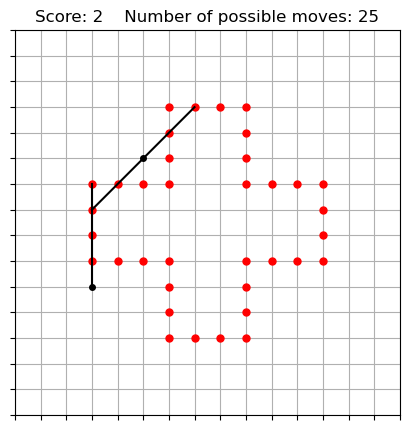

In [6]:
game.playAtRandom(1)
game.print()

Play several moves at random:

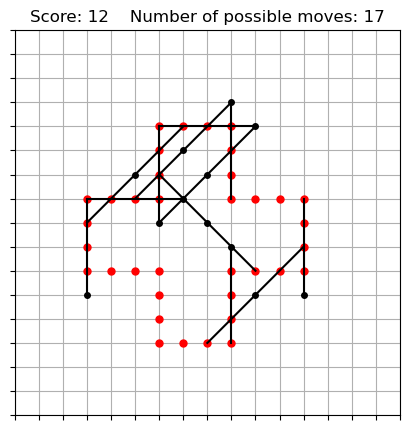

In [7]:
game.playAtRandom(10)
game.print()

Play at random until no more moves are possible:

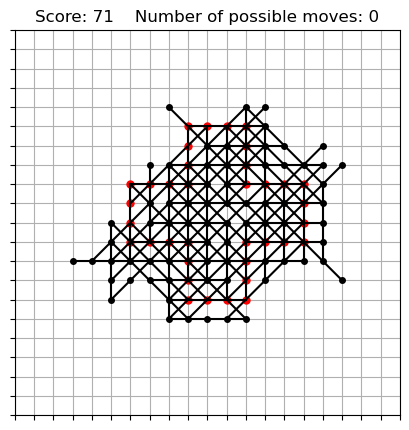

In [8]:
game.playAtRandom()
game.print()

Save game:

In [9]:
game.save('data/test_game.json')

Undo one move:

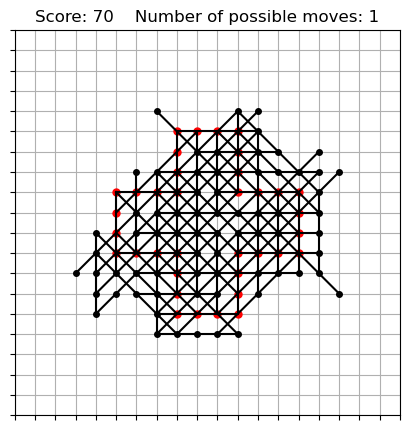

In [10]:
game.undo()
game.print()

Undo more moves:

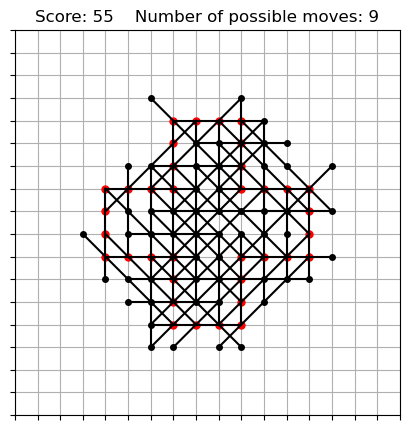

In [11]:
game.undo(15)
game.print()

Load a previously saved game:

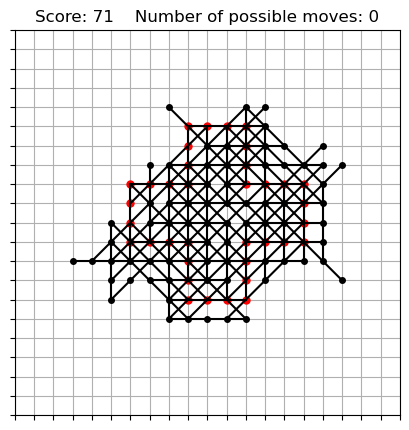

In [12]:
game = PyMorpionSolitaire.Game5T.load('data/test_game.json')
game.print()

Play using the nested Monte-Carlo algorithm:

CPU times: user 110 ms, sys: 4.1 ms, total: 114 ms
Wall time: 112 ms


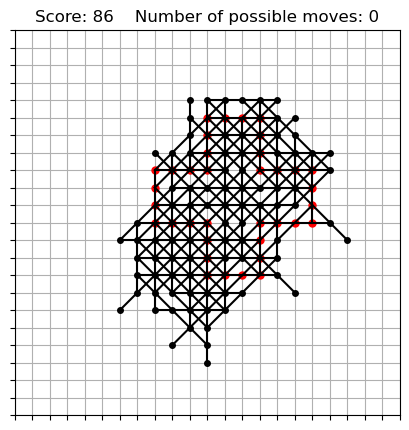

In [13]:
%%time
game.restart()
game.playNestedMC(1)
game.print()

CPU times: user 2.73 s, sys: 16.4 ms, total: 2.75 s
Wall time: 2.71 s


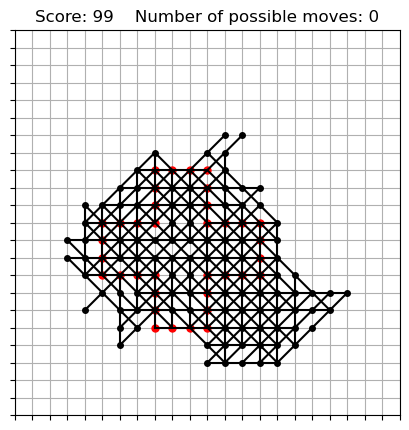

In [14]:
%%time
game.restart()
game.playNestedMC(2)
game.print()

CPU times: user 22min 34s, sys: 3.14 s, total: 22min 38s
Wall time: 22min 36s


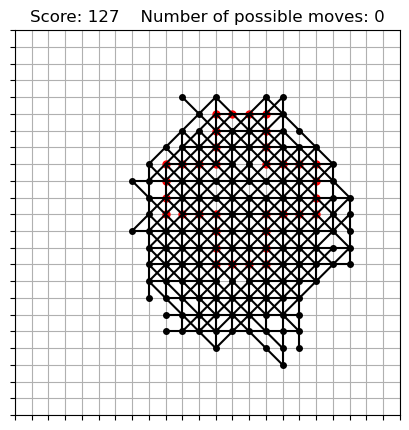

In [15]:
%%time
game.restart()
game.playNestedMC(3)
game.print()

In [16]:
game.save('data/highest_score.json')